In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam



2025-02-28 13:11:57.230243: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 13:11:57.279248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740728517.320030  905867 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740728517.330347  905867 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 13:11:57.373873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# data generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = './train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = './test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 20000 files belonging to 2 classes.


I0000 00:00:1740728599.171290  905867 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 5000 files belonging to 2 classes.


In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

In [4]:
# create the CNN architecture
# first we will try with tanh as activation then we will try with relu

model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/home/harry/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset)

Epoch 1/10


I0000 00:00:1740728623.107263  906192 service.cc:148] XLA service 0x7f6f8801de90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740728623.107624  906192 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-02-28 13:13:43.161302: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740728623.577296  906192 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/313 ━━━━━━━━━━━━━━━━━━━━ 30s 99ms/step - accuracy: 0.4375 - loss: 0.9636   

I0000 00:00:1740728637.402483  906192 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 129ms/step - accuracy: 0.5868 - loss: 0.6884 - val_accuracy: 0.6796 - val_loss: 0.5963
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.7004 - loss: 0.5706 - val_accuracy: 0.7292 - val_loss: 0.5374
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.7527 - loss: 0.5061 - val_accuracy: 0.7604 - val_loss: 0.4961
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.7803 - loss: 0.4684 - val_accuracy: 0.7662 - val_loss: 0.4848
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8112 - loss: 0.4201 - val_accuracy: 0.7654 - val_loss: 0.4877
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8371 - loss: 0.3773 - val_accuracy: 0.7706 - val_loss: 0.4972
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.8602 - loss: 0.3353 - val_accuracy: 0.7820 - val_loss: 0.4802
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8885 - loss: 0.2908 - val

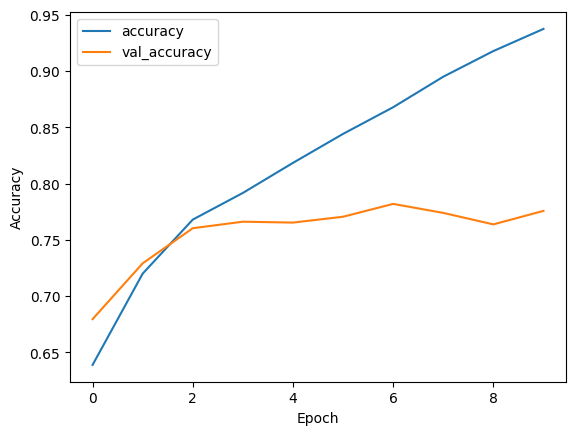

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# we see from the above plot that overfitting is happening. So we will try with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 105ms/step - accuracy: 0.5983 - loss: 0.6634 - val_accuracy: 0.6990 - val_loss: 0.5775
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.7025 - loss: 0.5673 - val_accuracy: 0.7446 - val_loss: 0.5211
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7559 - loss: 0.5012 - val_accuracy: 0.7580 - val_loss: 0.4952
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7949 - loss: 0.4436 - val_accuracy: 0.7696 - val_loss: 0.4885
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8217 - loss: 0.3970 - val_accuracy: 0.7724 - val_loss: 0.4757
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8448 - loss: 0.3536 - val_accuracy: 0.7764 - val_loss: 0.4867
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.8766 - loss: 0.3026 - val_accuracy: 0.7760 - val_loss: 0.4957
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9008 - loss: 0

### Now we try with relu activation

In [11]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.5796 - loss: 0.6606 - val_accuracy: 0.7118 - val_loss: 0.5677
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.7080 - loss: 0.5626 - val_accuracy: 0.7502 - val_loss: 0.5082
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.7590 - loss: 0.5024 - val_accuracy: 0.7716 - val_loss: 0.4835
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.7878 - loss: 0.4596 - val_accuracy: 0.7934 - val_loss: 0.4510
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8058 - loss: 0.4239 - val_accuracy: 0.7962 - val_loss: 0.4429
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8172 - loss: 0.4086 - val_accuracy: 0.7880 - val_loss: 0.4456
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8273 - loss: 0.3853 - val_accuracy: 0.7886 - val_loss: 0.4558
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.8400 - loss: 0.